In [1]:
import csv
import numpy as np
from scipy.integrate import quad
from numpy import *
from scipy import *

amuExp = 1165920715e-12 #116592089E-11 #
amuThe = 116592033e-11 #116591810e-11
amu = amuExp-amuThe
ErramuExp = 22e-11
ErramuThe = 43e-11
Eamu = np.sqrt(ErramuExp**2 + ErramuThe**2)
amu_up = amu+Eamu
amu_central = amu
amu, Eamu, amu_up, amu_central

import mplhep as hep 
hep.style.use(hep.style.ATLAS)


In [2]:
# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
linestyle_str = [
    ('solid', 'solid'), # Same as (0, ()) or '-'
    ('dotted', '.'),    # Same as (0, (1, 1)) or '.'
    ('dashed', '--'),   # Same as '--'
    ('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
from  matplotlib import *
import mplhep as hep 
hep.style.use(hep.style.ATLAS)
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9,6)
import matplotlib.patheffects as pe
# Global Parameters in GeV units
m_mu = 0.105  # Muon mass
# Experimental Bounds
bound_current_eup = [(x, amu_up) for x in range(0, 100000)]
bound_current_central = [(x, amu_central) for x in range(0, 100000)]
sigma_current = [(x, Eamu) for x in range(1, 100000)]
#sigma_projected = [(x, 34e-11) for x in range(1, 100000)]


In [3]:
m_mu = 0.105  # masa del muón
lambda22 = 3.0 

def lambda1_func(m_mu, mphi):
    return m_mu / mphi

def integrand(x, epsilon_1, lambda1, sign=1):
    return (x**2 * (1 + sign*epsilon_1 - x)) / ((1 - x) * (1 - lambda1**2 * x) + epsilon_1**2 * lambda1**2 * x)

def compute_delta(m_E, m_mu, lambda22, mphi):
    epsilon_1 = m_E / m_mu
    gs1 = lambda22 / 2
    gp1 = gs1
    lambda1_val = lambda1_func(m_mu, mphi)
    integral_pos, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, 1))
    integral_neg, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, -1))
    term1 = (gs1**2 * m_mu**2) / (8 * np.pi**2 * mphi**2) * integral_pos
    term2 = (gp1**2 * m_mu**2) / (8 * np.pi**2 * mphi**2) * integral_neg
    return term1 + term2

m_E_range = np.linspace(1, 10000, 2000) #np.logspace(0, 4, 2000)  # de 1 a 10^4

mphi_values = [200, 300]  # dos valores fijos de mphi

results = {}
for mphi in mphi_values:
    DamPhi = [compute_delta(m_E, m_mu, lambda22, mphi) for m_E in m_E_range]
    results[mphi] = DamPhi


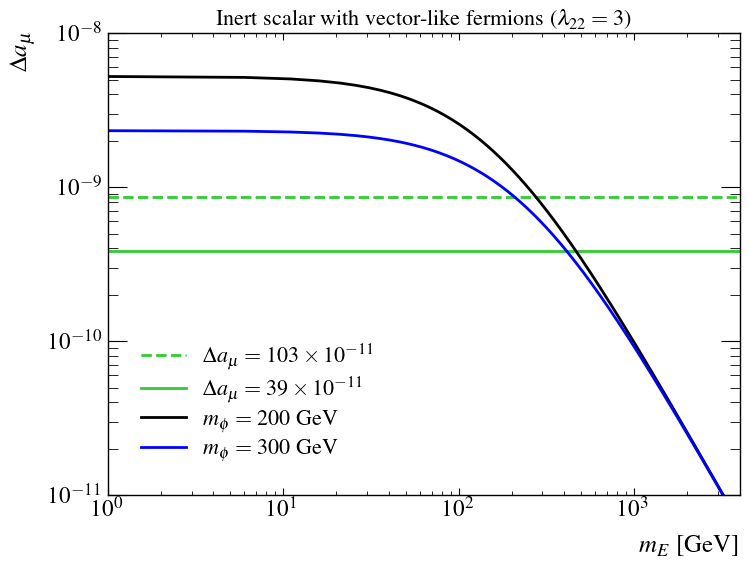

In [4]:

pek2=[pe.Stroke(linewidth=1.9, foreground='k',alpha=0.5), pe.Normal()]
pek1=[pe.Stroke(linewidth=1, foreground='limegreen',alpha=0.8), pe.Normal()]



plt.figure(figsize=(8,6))
x = m_E_range  
BoundCurrenteup = np.full_like(x, amu_up)
BoundCurrentdown = np.full_like(x, amu_central)

plt.plot(x, BoundCurrenteup, 'limegreen', linestyle='--', linewidth=2, zorder=0.5, path_effects=pek1, label=r'$\Delta  a_{\mu} = 103\times 10^{-11}$')
plt.plot(x, BoundCurrentdown, 'limegreen', linestyle='solid', linewidth=2, zorder=0.5, path_effects=pek1, label=r'$\Delta  a_{\mu} = 39\times 10^{-11}$')

colors = {200: 'k', 300: 'b'}
labels = {200: r'$m_\phi=200$ GeV', 300: r'$m_\phi=300$ GeV'}

for mphi in mphi_values:
    plt.plot(m_E_range, results[mphi], color=colors[mphi], linewidth=2, label=labels[mphi])

plt.xlim([1e00,4e03])
plt.ylim([10**(-11),10**(-8)])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$m_E$ [GeV]', loc="right", fontsize=18)
plt.ylabel(r'$\Delta a_{\mu} $',loc='top', fontsize=18) 
plt.legend(loc='lower left', shadow=False, fontsize=16,frameon=False,ncol=1)
plt.title(r'Inert scalar with vector-like fermions ($\lambda_{22} = 3$)',fontsize=16)
plt.savefig('331vectorlikecase2.pdf', format='pdf', bbox_inches='tight')
#plt.draw()
plt.show()

